In [23]:
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from nltk.corpus import stopwords
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import urllib3
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alfredo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df2 = pd.read_csv('CoronaDatabase.csv')

In [3]:
df2.head()

,noticia,classificacao
0,Café previne o coronavírus,1
1,Beber água de 15 em 15 minutos cura o coronavírus,1
2,Chá de limão com bicarbonato quente cura coron...,1
3,Ministro da Saúde pede para compartilhar áudio...,1
4,"Aplicativo Coronavírus-SUS, do Governo do Bras...",1


In [4]:
df2 = df2[['noticia', 'classificacao']]
df2 = df2.rename(columns={"noticia": "noticia", "classificacao": "label"})
df2['label'] = df2['label'].replace({0: 'true', 1: 'fake'})
df2.tail()
#df = df.append(df2, ignore_index=True)

,noticia,label
275,Brasil tem mais de 1 milhão de casos confirmad...,true
276,Brasil ultrapassa 1 milhão de casos confirmado...,true
277,Brasil ultrapassa 1 milhão de casos confirmado...,true
278,O Brasil está testando menos do que deveria,true
279,O Brasil está teste muito pouco,true


In [5]:
x_train,x_test,y_train,y_test=train_test_split(df2['noticia'], df2['label'], test_size=0.2,random_state=10)

In [6]:
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True,
                                   max_df=.5,
                                   lowercase =True,
                                   stop_words=stopwords.words('portuguese'))
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [7]:
selector = SelectPercentile(f_classif, percentile=100)
selector.fit(tfidf_train, y_train)

SelectPercentile(percentile=100,
                 score_func=<function f_classif at 0x0000007DE0D27EE8>)

In [8]:
features_train = selector.transform(tfidf_train).toarray()
features_test = selector.transform(tfidf_test).toarray()

In [18]:
#SVM
model = SVC(kernel='rbf', C=6000, gamma=.0003)
model.fit (features_train, y_train)

y_pred = model.predict(features_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 91.07%


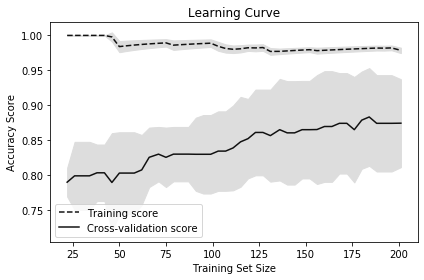

In [27]:
#Curva de aprendizagem da SVM
# Criando curva de aprendizagem
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='rbf', C=6000, gamma=.0003), 
                                                        features_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [30]:
# métricas de qualidade da SVM
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        fake       0.92      0.98      0.95        46
        true       0.86      0.60      0.71        10

    accuracy                           0.91        56
   macro avg       0.89      0.79      0.83        56
weighted avg       0.91      0.91      0.90        56



In [35]:
#Random Forest
clf = RandomForestClassifier(n_estimators = 100)
clf.fit (features_train, y_train)

y_rf_pred = clf.predict(features_test)
score = accuracy_score(y_test,y_rf_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 89.29%


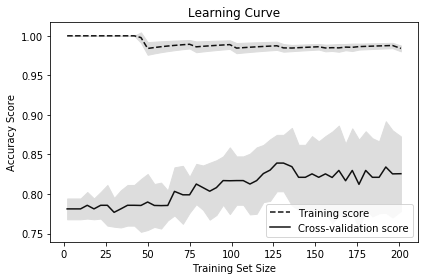

In [36]:
#Curva de aprendizagem da Random Forest
# Criando curva de aprendizagem
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators = 100), 
                                                        features_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [34]:
# métricas de qualidade da RF
print(classification_report(y_test,y_rf_pred))

              precision    recall  f1-score   support

        fake       0.88      1.00      0.94        46
        true       1.00      0.40      0.57        10

    accuracy                           0.89        56
   macro avg       0.94      0.70      0.76        56
weighted avg       0.91      0.89      0.87        56



In [11]:
df3 = pd.read_csv('CoronaResult.csv')

In [12]:
df3

,noticia,classificacao
0,beber água quente não mata o coronavírus,0
1,china lança vacina contra o coronavírus,1
2,o Brasil ultrapassa um milhão de infectados pe...,0
3,o coronavirus se espalha pelo ar,1
4,vitamina c não protege contra coronavirus,0
5,Colocar luvas ao mexer em dinheiro e evitar co...,0
6,beber água quente mata o coronavírus,1
7,café previne coronavirus,1


In [13]:
tfidf_target = tfidf_vectorizer.transform(df3['noticia'])

In [14]:
features_target = selector.transform(tfidf_target).toarray()

In [15]:
result_target = model.predict(features_target)
print(result_target)

['fake' 'fake' 'true' 'fake' 'fake' 'true' 'fake' 'fake']


In [16]:
result_target = clf.predict(features_target)
print(result_target)

['fake' 'fake' 'true' 'fake' 'fake' 'true' 'fake' 'fake']


In [17]:
for i in range(len(df3['noticia'])):
    if result_target[i]=='fake' :
        df3['classificacao'][i] = False
    else:
        df3['classificacao'][i] = True
    
display(df3)

C:\Users\alfredo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alfredo\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,noticia,classificacao
0,beber água quente não mata o coronavírus,False
1,china lança vacina contra o coronavírus,False
2,o Brasil ultrapassa um milhão de infectados pe...,True
3,o coronavirus se espalha pelo ar,False
4,vitamina c não protege contra coronavirus,False
5,Colocar luvas ao mexer em dinheiro e evitar co...,True
6,beber água quente mata o coronavírus,False
7,café previne coronavirus,False
